## Exploring simulated data files from LDMX

In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/kaons_pn_example.root")

In [3]:
ic=0
for chunk_dict in ldmx_dict:
    if ic==0: print(chunk_dict)
    ic+=1

[{Proc_id: 7, Sim_Kaon_pdgID: [310], Sim_Kaon_trkID: [3, ... 591, 591, 591, 591]}]


One annoying thing is that once you have run the generator cell you need to restart the kernel if you want to re-generate it (Generators in python can't be rewound). So let's run the same line again.

In [4]:
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/kaons_pn_example.root")

Now let's define a couple of functions to add more variables to out dictionary

In [5]:
# let's define a couple of histograms
# each .Bin defines a new axis of the histogram

hists = {}
hists["Target_kaon_hist"] = hist.Hist("Target SP Kaons",
                                hist.Bin("k", r"Kaon Energy [MeV]", 40, 0, 4000)
                            )

hists["Target_ep_hist"] = hist.Hist("Target SP Kaons", 
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 4000),
                                hist.Bin("p", r"Photon Energy [MeV]", 40, 0, 4000),
                            )



In [6]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    target_kaon = ldmx_events['Target_Kaon']
    target_electron = ldmx_events['Target_Electron']
    target_photon = ldmx_events['Target_Photon']
    
    
    #target_kaon = add_angle(target_kaon)
    
    #target_kaon_dau1 = ldmx_events['Target_Kaon_dau1']
    #target_kaon_dau1 = add_angle(target_kaon_dau1)
    
    masks_id = {'Kshort': 310,
                'Klong': 130,
                'Kpm': 321,
               }
    masses = {'Kshort': 497.648,
              'Klong': 497.648,
              'Kpm': 493.677
             }
    
    def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
        try:
            return ak.to_numpy(ak.flatten(x,axis=axis)) 
        except:
            return x
    
    hists["Target_kaon_hist"].fill(
                                 k=flat(target_kaon.e)
                                )
    
    hists["Target_ep_hist"].fill(
                                 e=flat(target_electron.e),
                                 p=flat(target_photon.e),
                                )

In [7]:
nchunk = 0
for chunk in ldmx_dict:
    # I usually test my code in one chunck only
    #if nchunk >= 1: break
    nchunk += 1
    print('process',nchunk)
    ProcessChunk(chunk, hists)

process 1


<Hist (e,p) instance at 0x12c0465e0>


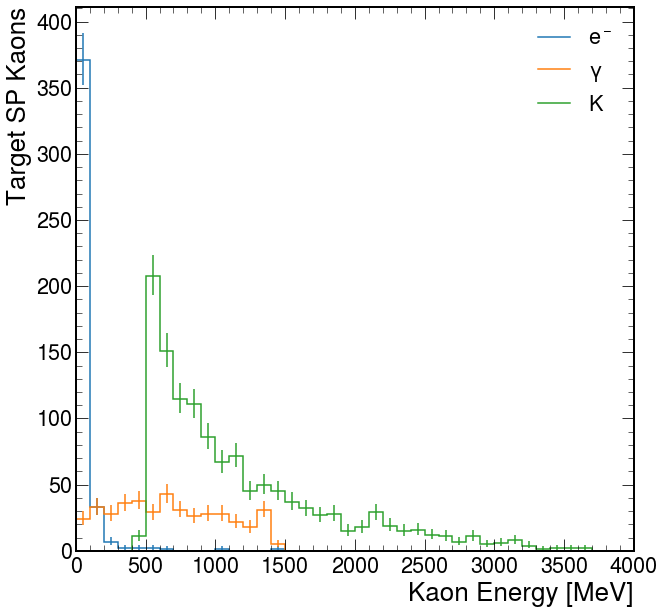

In [11]:
print(hists["Target_ep_hist"])
fig, ax = plt.subplots()
hist.plot1d(hists["Target_ep_hist"].sum('e'),ax=ax,clear=False);
hist.plot1d(hists["Target_ep_hist"].sum('p'),ax=ax,clear=False);
hist.plot1d(hists["Target_kaon_hist"],ax=ax,clear=False);
leg = ax.legend([r'$e^-$',r'$\gamma$',r'$K$'])